
# Transformer


The most important part of the transformer is the Self-Attention mechanism.
For possible Exam exercises you should be able to calculate the self-attention between multiple vectors.

A possible exercise could have multiple "difficulties".


*   Self-Attention completely seperate from transformer
*   Scaled KQV-Self Attention
*   Multihead-Scaled-KQV-Self-Attention

We'll probably never ask about Multihead attention so lets create an exercise for Scaled-KQV-Self-Attention


## Reminder Formulas:
###Self-Attention

$w'_{ij} = x^T_i \cdot x_j$

$w_{ij} =$ softmax over all calculated $w'_{ij}$ → $w_{ij} = \frac{e^{w'_{ij}}}{\sum_j e^{w'_{ij}}}$ 

$y_i = \sum_j w_{ij} x_j$

###Scaled-KQV-Self-Attention

Generate $k_i$, $q_i$ and $v_i$ with three fully connected layers for all inputs $x_i$.

Scale dot product with number of elements in input vectors.

$w'_{ij} = \frac{q^T_i \cdot k_j}{\sqrt{d}}$

$w_{ij} = \frac{e^{w'_{ij}}}{\sum_j e^{w'_{ij}}}$ 

$y_i = \sum_j w_{ij} v_j$

### Exercise: Calculate for each input vector its self attention feature with Scaled-KQV-Self-attention

In the exam we could theoretically give you multiple input vectors $x_i$ and 3 fully connected layers. Then you should be able to calculate  and $k_i$, $q_i$ and $v_i$ for each input vector with the normal forward pass of a perceptron. 

But most likely we'll just give you $k$, $q$, and $v$, for each input vector.

Let's say we have three input vectors

#### KQV for input vector $x_1$

$ k_1 = \left[ \begin{array}{r} 2 \\ 1 \\ 3 \\ \end{array}\right]$
$ q_1 = \left[ \begin{array}{r} 5 \\ 2 \\ 5 \\ \end{array}\right]$
$ v_1 = \left[ \begin{array}{r} 6 \\ 0 \\ 1 \\ \end{array}\right]$

#### KQV for input vector $x_2$
$ k_2 = \left[ \begin{array}{r} 7 \\ 2 \\ -3 \\ \end{array}\right]$
$ q_2 = \left[ \begin{array}{r} -1 \\ -5 \\ -2 \\ \end{array}\right]$
$ v_2 = \left[ \begin{array}{r} -2 \\ -1 \\ 2 \\ \end{array}\right]$

#### KQV for input vector $x_3$
$ k_3 = \left[ \begin{array}{r} 4 \\ -2 \\ 1 \\ \end{array}\right]$
$ q_3 = \left[ \begin{array}{r} 7 \\ 2 \\ 4 \\ \end{array}\right]$
$ v_3 = \left[ \begin{array}{r} -3 \\ 5 \\ 2 \\ \end{array}\right]$


This exercise requires you to calculate $y_1$, $y_2$ and $y_3$

In an exam we would probably only ask you to calculate one of these three attention features

## Attention feature of $x_1$

Each vector has dimension 3 so we scale with $\sqrt{3}$

### Relvant formula: $w'_{ij} = \frac{q^T_i \cdot k_j}{\sqrt{d}}$
<br/><br/>


$w'_{11} = \frac{q_1^T \cdot k_1}{\sqrt{3}} = \frac{\left[ \begin{array}{rrr} 5 & 2 & 5 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 2 \\ 1 \\ 3 \\ \end{array}\right] }{\sqrt{3}} = \frac{5*2+2*1+5*3}{\sqrt{3}} = \frac{27}{\sqrt{3}} = 15.59$

$w'_{12} = \frac{q_1^T \cdot k_2}{\sqrt{3}} = \frac{\left[ \begin{array}{rrr} 5 & 2 & 5 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 7 \\ 2 \\ -3 \\ \end{array}\right] }{\sqrt{3}} = \frac{5*7+2*2-5*3}{\sqrt{3}} = \frac{24}{\sqrt{3}} = 13.86$

$w'_{13} = \frac{q_1^T \cdot k_3}{\sqrt{3}} = \frac{\left[ \begin{array}{rrr} 5 & 2 & 5 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 4 \\ -2 \\ 1 \\ \end{array}\right] }{\sqrt{3}} = \frac{5*4-2*2+5*1}{\sqrt{3}} = \frac{21}{\sqrt{3}} = 12.12$
<br/><br/>

### Relvant formula: $w_{ij} = \frac{e^{w'_{ij}}}{\sum_j e^{w'_{ij}}}$ 


Now lets calculate the softmax for each scaled dot product

$w_{11} = \frac{e^{15.59}} {e^{15.59}+e^{13.86} + e^{12.12}} = 0.83$

$w_{12} = \frac{e^{13.86}} {e^{15.59}+e^{13.86} + e^{12.12}} = 0.15$

$w_{13} = \frac{e^{12.12}} {e^{15.59}+e^{13.86} + e^{12.12}} = 0.02$

These are the three attention values. You can interpret them as follows:

For vector $x_1$, $x_1$ is 84% relevant, vector $x_2$ is 15% relevant and vector $x_3$ is 2% relevant
<br/><br/>

### Relvant formula: $y_i = \sum_j w_{ij} v_j$

Let's use these weights to calculate our final attention feature vector $y_1$

$y_1 = 0.83 * \left[ \begin{array}{r} 6 \\ 0 \\ 1 \\ \end{array}\right] + 0.15* \left[ \begin{array}{r} -2 \\ -1 \\ 2 \\ \end{array}\right] + 0.02* \left[ \begin{array}{r} -3 \\ 5 \\ 2 \\ \end{array}\right] $

$y_1= \left[ \begin{array}{r} 4.98 \\ 0 \\ 0.83 \\ \end{array}\right] + \left[ \begin{array}{r} -0.3 \\ -0.15 \\ 0.3 \\ \end{array}\right] + \left[ \begin{array}{r} -0.06 \\ 0.1 \\ 0.04 \\ \end{array}\right]$

$y_1 = \left[ \begin{array}{r} 4.62 \\ -0.05 \\ 1.17 \\ \end{array}\right]$


## Attention feature of $x_2$

$w'_{21} = \frac{q_2^T \cdot k_1}{\sqrt{3}} = \frac{\left[ \begin{array}{rrr} -1 & -5 & -2 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 2 \\ 1 \\ 3 \\ \end{array}\right] }{\sqrt{3}} = \frac{-1*2-5*1-2*3}{\sqrt{3}} = \frac{-13}{\sqrt{3}} = -7.51$

$w'_{22} = \frac{q_2^T \cdot k_2}{\sqrt{3}} = \frac{\left[ \begin{array}{rrr} -1 & -5 & -2 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 7 \\ 2 \\ -3 \\ \end{array}\right] }{\sqrt{3}} = \frac{-1*7-5*2+2*3}{\sqrt{3}} = \frac{-11}{\sqrt{3}} = -6.35$

$w'_{23} = \frac{q_2^T \cdot k_3}{\sqrt{3}} = \frac{\left[ \begin{array}{rrr} -1 & -5 & -2 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 4 \\ -2 \\ 1 \\ \end{array}\right] }{\sqrt{3}} = \frac{-1*4+5*2-2*1}{\sqrt{3}} = \frac{4}{\sqrt{3}} = 2.31$


### softmax

$w_{21} = \frac{e^{-7.51}} {e^{-7.51}+e^{-6.35} + e^{2.31}} = 0.00$

$w_{22} = \frac{e^{-6.35}} {e^{-7.51}+e^{-6.35} + e^{2.31}} = 0.00$

$w_{23} = \frac{e^{2.31}} {e^{-7.51}+e^{-6.35} + e^{2.31}} = 1.00$

for the second input vector, only the third input vector is relevant

### attention feature

$y_2 = 0.00 * \left[ \begin{array}{r} 6 \\ 0 \\ 1 \\ \end{array}\right] + 0.00* \left[ \begin{array}{r} -2 \\ -1 \\ 2 \\ \end{array}\right] + 1.00* \left[ \begin{array}{r} -3 \\ 5 \\ 2 \\ \end{array}\right] $

$y_2 = \left[ \begin{array}{r} -3 \\ 5 \\ 2 \\ \end{array}\right] $


## Attention feature of $x_3$

$w'_{31} = \frac{q_3^T \cdot k_1}{\sqrt{3}} = \frac{\left[ \begin{array}{rrr} 7 & 2 & 4 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 2 \\ 1 \\ 3 \\ \end{array}\right] }{\sqrt{3}} = \frac{7*2+2*1+4*3}{\sqrt{3}} = \frac{28}{\sqrt{3}} = 16.17$

$w'_{32} = \frac{q_3^T \cdot k_2}{\sqrt{3}} = \frac{\left[ \begin{array}{rrr} 7 & 2 & 4 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 7 \\ 2 \\ -3 \\ \end{array}\right] }{\sqrt{3}} = \frac{7*7+2*2-4*3}{\sqrt{3}} = \frac{41}{\sqrt{3}} = 23.67$

$w'_{33} = \frac{q_3^T \cdot k_3}{\sqrt{3}} = \frac{\left[ \begin{array}{rrr} 7 & 2 & 4 \end{array}\right] \ \cdot \ \left[ \begin{array}{r} 4 \\ -2 \\ 1 \\ \end{array}\right] }{\sqrt{3}} = \frac{7*4-2*2+4*1}{\sqrt{3}} = \frac{28}{\sqrt{3}} = 16.17$


### softmax

$w_{31} = \frac{e^{16.17}} {e^{16.17}+e^{23.67} + e^{16.17}} = 0.00$

$w_{32} = \frac{e^{23.67}} {e^{16.17}+e^{23.67} + e^{16.17}} = 1.00$

$w_{33} = \frac{e^{16.17}} {e^{16.17}+e^{23.67} + e^{16.17}} = 0.00$

for the third input vector, only the second input vector is relevant

### attention feature

$y_3 = 0.00 * \left[ \begin{array}{r} 6 \\ 0 \\ 1 \\ \end{array}\right] + 1.00* \left[ \begin{array}{r} -2 \\ -1 \\ 2 \\ \end{array}\right] + 0.00* \left[ \begin{array}{r} -3 \\ 5 \\ 2 \\ \end{array}\right] $

$y_3 = \left[ \begin{array}{r} -2 \\ -1 \\ 2 \\ \end{array}\right] $


So the result of our Attention are the three vectors

$\left[ \begin{array}{r} 4.62 \\ -0.05 \\ 1.17 \\ \end{array}\right] \left[ \begin{array}{r} -3 \\ 5 \\ 2 \\ \end{array}\right] \left[ \begin{array}{r} -2 \\ -1 \\ 2 \\ \end{array}\right]$



# You should be able to calculate this in the exam.

### Also exercise the "easier" self-attention without kqv and scaling!




## How is Multihead Attention implemented in Python?

![](https://git.scc.kit.edu/vy9905/ml2images/-/raw/main/mha.png)

In [ ]:
# timm --> pyTorch IMage Models contains multiple different vision transformer
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 512 kB 34.6 MB/s 


In [ ]:
import torch
import torch.nn as nn


class Attention(nn.Module):
    """Attention mechanism.
    Parameters
    ----------
    dim : int
        Input and output dimension of each input vector.
    n_heads : int
        Number of attention heads.

    Attributes
    ----------
    scale : float
        Normalizing constant for the dot product.
    qkv : nn.Linear
        Linear projection for the query, key and value.
    proj : nn.Linear
        We skipped this linear layer in the lecture
        Linear mapping that takes in the concatenated output of all attention
        heads and maps it into a new space.
    """
    def __init__(self, dim, n_heads=12):
        super().__init__()
        self.n_heads = n_heads
        self.dim = dim
        self.head_dim = dim // n_heads
        self.scale = self.head_dim ** -0.5
        
        self.qkv = nn.Linear(dim, dim * 3)
        
        #  We create a linear layer that takes a vector which contains
        #  d input elements and create a resulting vector with size d*3
        #  in which we store k, q and v.

        #  This is identical to:
        #  k = nn.Linear(dim, dim)
        #  q = nn.Linear(dim, dim)
        #  v = nn.Linear(dim, dim)
        #  self.qkv = torch.cat(q,k,v dim=-1)


        # we didn't talk about this linear layer in the lecture
        # after we put the results of our multiple heads back together
        # we use one more linear layer
        self.proj = nn.Linear(dim, dim)

    def forward(self, x):
        """Run forward pass.
        Parameters
        ----------
        x : torch.Tensor
            Shape `(batchsize, number of input vectors, dim)`.
        Returns
        -------
        torch.Tensor
            Shape `(batchsize, number of input vectors, dim)`.
        """
        batchsize, n_input_vectors, dim = x.shape

        if dim != self.dim:
            raise ValueError

        qkv = self.qkv(x)  # (batchsize, number input vectors, 3 * dim)
        
        """
        qkv calculates for all input vectors their key query and value vectors
        Now we  have to "cut out" the heads of the resulting vector 
        """
        qkv = qkv.reshape(
                batchsize, n_input_vectors, 3, self.n_heads, self.head_dim
        )  # (batchsize, number input vectors, 3, n_heads, head_dim)
        
        """
        Lets change the order of the dimensions so we can calculate the dot product
        of all heads at the same time
        """
        qkv = qkv.permute(
                2, 0, 3, 1, 4
        )  # (3, batchsize, n_heads, number input vectors, head_dim)

        """
        q contains the queries of all heads of all input vectors
        same for k and v
        """
        q, k, v = qkv[0], qkv[1], qkv[2]

        k_t = k.transpose(-2, -1)  # (batchsize, n_heads, head_dim, number input vectors)

        """
        @ is the symbol for matrix multiplication
        self.scale = 1 / root(d)
        """
        s_dot_prpduct = ( q @ k_t) * self.scale # (batchsize, n_heads, number input vectors, number input vectors)
        
        attn = s_dot_prpduct.softmax(dim=-1)  # (batchsize, n_heads, number input vectors, number input vectors)

        weighted_avg = attn @ v  # (batchsize, n_heads, number input vectors, head_dim)
        
        """
        reverse order of number input vectors and n_heads ()
        """
        weighted_avg = weighted_avg.transpose(
                1, 2
        )  # (batchsize, number input vectors, n_heads, head_dim)

        """
        Merge the heads back into one input vector
        """
        weighted_avg = weighted_avg.flatten(2)  # (batchsize, number input vectors, dim)

        """
        one final fully connected layer (not shown in lecture)
        """
        x = self.proj(weighted_avg)  # (batchsize, number input vectors, dim)

        return x

## create 10 input vectors each with size 800. 
dummy_input = torch.rand(1,10, 800)

## create Multihead Attention Block
mha = Attention(dim=800, n_heads=4)

## feed dummy input through multihead attention
dummy_result = mha(dummy_input)
print(f"input shape was {dummy_input.shape}, output shape should be identical {dummy_result.shape}")

input shape was torch.Size([1, 10, 800]), output shape should be identical torch.Size([1, 10, 800])


Implementation of Fully Connected Layer

![](https://git.scc.kit.edu/vy9905/ml2images/-/raw/main/FC.png)

In [ ]:
class MLP(nn.Module):
    """Multilayer perceptron.

    Called fc-layer in lecture  (blue block inside the transformer block)

    two fully connected layers. 
        - the first fully connected layer increases vector size
        - the second fuly connected layer decreases vector size back to input size

    Parameters
    ----------
    in_features : int
        Number of input features.
    hidden_features : int
        Number of nodes in the hidden layer.

    Attributes
    ----------
    fc : nn.Linear
        The First linear layer.
    act : nn.GELU
        GELU activation function.
    fc2 : nn.Linear
        The second linear layer.

    """
    def __init__(self, in_features, hidden_features):
        super().__init__()
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = nn.GELU()
        self.fc2 = nn.Linear(hidden_features, in_features)

    def forward(self, x):
        """Run forward pass.
        Parameters
        ----------
        x : torch.Tensor
            Shape `(batchsize, number input vectors, in_features)`.
        Returns
        -------
        torch.Tensor
            Shape `(batchsize, number input vectors, in_features)`
        """
        x = self.fc1(x)  # (batchsize, number input vectors, hidden_features)
        x = self.act(x)  # (batchsize, number input vectors, hidden_features)
        x = self.fc2(x)  # (batchsize, number input vectors, out_features)
        return x

## create 10 input vectors each with size 800. 
dummy_input = torch.rand(1,10, 800)

## create MLP Block
FC = MLP(in_features=800, hidden_features=4*800)

## feed dummy input through fully connected layers
dummy_result = FC(dummy_input)
print(f"input shape was {dummy_input.shape}, output shape should be identical {dummy_result.shape}")

input shape was torch.Size([1, 10, 800]), output shape should be identical torch.Size([1, 10, 800])


A Transformer Block contains 


*   A multihead attention block
*   A fully connected block
*   Two normalization layer



In [ ]:
class Block(nn.Module):
    """Transformer block.
    Parameters
    ----------
    dim : int
        Embeddinig dimension.
    n_heads : int
        Number of attention heads.
    mlp_ratio : float
        Determines the hidden dimension size of the `MLP` module with respect
        to `dim`.

    Attributes
    ----------
    norm1, norm2 : LayerNorm
        Layer normalization.
    attn : Attention
        Attention module.
    mlp : MLP
        MLP module.
    """
    def __init__(self, dim, n_heads, mlp_ratio=4.0):
        super().__init__()
        self.norm1 = nn.LayerNorm(dim, eps=1e-6)
        self.attn = Attention(
                dim,
                n_heads=n_heads,
        )
        ## Layer norm is (a-µ)/sigma
        ## it is possible that the standard deviation == 0 so we always add a tiny value (eps) 
        self.norm2 = nn.LayerNorm(dim, eps=1e-6)

        """
        The MLP Block uses two fully connected layers
        the first fully connected layers creates a vector that is
        large than the input vector 
        """
        hidden_features = int(dim * mlp_ratio)
        self.mlp = MLP(
                in_features=dim,
                hidden_features=hidden_features
        )

    def forward(self, x):
        """Run forward pass.
        Parameters
        ----------
        x : torch.Tensor
            Shape `(batchsize, number input vectors, dim)`.
        Returns
        -------
        torch.Tensor
            Shape `(batchsize, number input vectors, dim)`.
        """

        ## Two skip connections
        ## in the lecture the normalizations was done later but it doesn't matter
        ## 
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))

        return x

## create 10 input vectors each with size 800. 
dummy_input = torch.rand(1,10, 800)

## create transformer block
transformer_block_1 = Block(dim=800, n_heads=4, mlp_ratio=4.0)
## and lets create another transformer Block
transformer_block_2 = Block(dim=800, n_heads=8, mlp_ratio=4.0)

## feed dummy input through both stacked transformer blocks
dummy_result = transformer_block_2(transformer_block_1(dummy_input))

print(f"input shape was {dummy_input.shape}, output shape should be identical {dummy_result.shape}")

input shape was torch.Size([1, 10, 800]), output shape should be identical torch.Size([1, 10, 800])


![](https://git.scc.kit.edu/vy9905/ml2images/-/raw/main/vit.png)

In the lecture it was said that we feed the patches into the transfomer.
Actually we cut out our patches with a convolutional layer and store them as 1-D vectors


In [ ]:
class PatchEmbed(nn.Module):
    """Split image into patches and then embed them.
    Parameters
    ----------
    img_size : int
        Size of the image (it is a square).
    patch_size : int
        Size of the patch (it is a square).
    embed_dim : int
        The emmbedding dimension. --> how many values should our input vector have
    Attributes
    ----------
    n_patches : int
        Number of patches inside of our image.
    proj : nn.Conv2d
        Convolutional layer that does both the splitting into patches
        and their embedding.
    """
    def __init__(self, img_size, patch_size, embed_dim=768):
        super().__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.n_patches = (img_size // patch_size) ** 2

        """
        Notice: Stride == kernel size
        This cuts out a patch and then uses a convolutional Layer to create a d-size vector
        """
        self.proj = nn.Conv2d(
                3, # 3 input channels because image is RGB
                embed_dim,
                kernel_size=patch_size,
                stride=patch_size,
        )

    def forward(self, x):
        """Run forward pass.
        Parameters
        ----------
        x : torch.Tensor
            Shape `(batchsize, in_chans, img_size, img_size)`.
        Returns
        -------
        torch.Tensor
            Shape `(batchsize, n_patches, embed_dim)`.
        """
        x = self.proj(x)  # (batchsize, embed_dim, n_patches ** 0.5, n_patches ** 0.5)
        
        """
        Create a 1-D vector of each patch
        """
        x = x.flatten(2)  # (batchsize, embed_dim, n_patches)
        x = x.transpose(1, 2)  # (batchsize, n_patches, embed_dim)

        return x

## Create dummy input image
dummy_image = torch.rand(1,3, 224, 224)

## Create patch embedding
embed_patch = PatchEmbed(img_size=224, patch_size=14, embed_dim=800)

## feed dummy image through patch embedding

patches = embed_patch(dummy_image)

print(f"we had an input image with size {dummy_image.shape}")
print(f"our output has shape {patches.shape}")
print(f"for an input image with 224x224 resolution and patchsize 14 we get 16*16 = 256 patches")

we had an input image with size torch.Size([1, 3, 224, 224])
our output has shape torch.Size([1, 256, 800])
for an input image with 224x224 resolution and patchsize 14 we get 16*16 = 256 patches


![](https://git.scc.kit.edu/vy9905/ml2images/-/raw/main/vit.png)

Whats missing now?


*   positional embedding that is added ontop of the patches
*   zeroth input vector
*   final classification



In [ ]:
class VisionTransformer(nn.Module):
    """Simplified implementation of the Vision transformer.
    Parameters
    ----------
    img_size : int
        Both height and the width of the image (it is a square).
    patch_size : int
        Both height and the width of the patch (it is a square).
    n_classes : int
        Number of classes.
    embed_dim : int
        Dimensionality of the token/patch embeddings.
    depth : int
        Number of blocks.
    n_heads : int
        Number of attention heads.
    mlp_ratio : float
        Determines the hidden dimension of the `MLP` module.

    Attributes
    ----------
    patch_embed : PatchEmbed
        Instance of `PatchEmbed` layer.
    cls_token : nn.Parameter
        Learnable parameter that will represent the first token in the sequence.
        It has `embed_dim` elements.
    pos_emb : nn.Parameter
        Positional embedding of the cls token + all the patches.
        It has `(number input vectors) * embed_dim` elements.
    blocks : nn.ModuleList
        List of `Block` modules.
    norm : nn.LayerNorm
        Layer normalization.
    """
    def __init__(
            self,
            img_size=384,
            patch_size=16,
            n_classes=1000,
            embed_dim=768,
            depth=12,
            n_heads=12,
            mlp_ratio=4.,
    ):
        super().__init__()

        self.patch_embed = PatchEmbed(
                img_size=img_size,
                patch_size=patch_size,
                embed_dim=embed_dim,
        )

        # create a zeroth vector with the same size as the patch vectors
        # but with trainable values
        # initialize with zeros
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        
        # create positional embedding
        # start with zeros and learn what they should be
        # (in lecture we had fixed positional encodings and not learned) 
        self.pos_embed = nn.Parameter(
                torch.zeros(1, 1 + self.patch_embed.n_patches, embed_dim)
        )

        # stack as many blocks as defined in input "depth"
        self.blocks = nn.ModuleList(
            [
                Block(
                    dim=embed_dim,
                    n_heads=n_heads,
                    mlp_ratio=mlp_ratio,
                )
                for _ in range(depth)
            ]
        )

        # one final layer norm at the end of the transformer
        self.norm = nn.LayerNorm(embed_dim, eps=1e-6)
        
        # final fully connected layer that takes the first output vector
        # and predicts values for all classes
        self.head = nn.Linear(embed_dim, n_classes)


    def forward(self, x):
        """Run the forward pass.
        Parameters
        ----------
        x : torch.Tensor
            Shape `(batchsize, in_chans, img_size, img_size)`.
        Returns
        -------
        logits : torch.Tensor
            Logits over all the classes - `(batchsize, n_classes)`.
        """
        batchsize = x.shape[0]

        # create patches from input image
        x = self.patch_embed(x)

        # only necessary because we train with batches
        cls_token = self.cls_token.expand(
                batchsize, -1, -1
        )  # (batchsize, 1, embed_dim)

        # put the the class token vector on the zeroth position
        x = torch.cat((cls_token, x), dim=1)  # (batchsize, 1 + n_patches, embed_dim)
        
        # add the positional encoding ontop of our input values
        x = x + self.pos_embed  # (batchsize, 1 + n_patches, embed_dim)

        # feed input through all transformer blocks
        for block in self.blocks:
            x = block(x)

        # Final normalization of the output
        x = self.norm(x)

        # take the vector that is on the zeroth position
        cls_token_final = x[:, 0]
        
        # feed it throuh a fully connected layer
        x = self.head(cls_token_final)

        return x


timm (torch image models) is a library that stored weights and architectures of transformers.

Lets load the weights of one of their transformers and set our weights to them.

In [ ]:
import numpy as np
import timm
import torch

# Helper functions, not important
def get_n_params(module):
    return sum(p.numel() for p in module.parameters() if p.requires_grad)

def assert_tensors_equal(t1, t2):
    a1, a2 = t1.detach().numpy(), t2.detach().numpy()

    np.testing.assert_allclose(a1, a2)

## download a smaller ViT architecture 
model_name = "vit_base_patch16_384"
model_official = timm.create_model(model_name, pretrained=True)
model_official.eval()
print(type(model_official))

# use the same config as is used in the timm model four our model
custom_config = {
        "img_size": 384,
        "patch_size": 16,
        "embed_dim": 768,
        "depth": 12,
        "n_heads": 12,
        "mlp_ratio": 4,
}

my_transformer = VisionTransformer(**custom_config)
my_transformer.eval()


## takes timm weights and stores them in my_transformer
## also does multiple assertions (uninteressant)
for (n_o, p_o), (n_c, p_c) in zip(
        model_official.named_parameters(), my_transformer.named_parameters()
):
    assert p_o.numel() == p_c.numel()
    print(f"{n_o} | {n_c}")

    p_c.data[:] = p_o.data

    assert_tensors_equal(p_c.data, p_o.data)

inp = torch.rand(1, 3, 384, 384)
res_c = my_transformer(inp)
res_o = model_official(inp)

# Asserts
assert get_n_params(my_transformer) == get_n_params(model_official)
assert_tensors_equal(res_c, res_o)

<class 'timm.models.vision_transformer.VisionTransformer'>
cls_token | cls_token
pos_embed | pos_embed
patch_embed.proj.weight | patch_embed.proj.weight
patch_embed.proj.bias | patch_embed.proj.bias
blocks.0.norm1.weight | blocks.0.norm1.weight
blocks.0.norm1.bias | blocks.0.norm1.bias
blocks.0.attn.qkv.weight | blocks.0.attn.qkv.weight
blocks.0.attn.qkv.bias | blocks.0.attn.qkv.bias
blocks.0.attn.proj.weight | blocks.0.attn.proj.weight
blocks.0.attn.proj.bias | blocks.0.attn.proj.bias
blocks.0.norm2.weight | blocks.0.norm2.weight
blocks.0.norm2.bias | blocks.0.norm2.bias
blocks.0.mlp.fc1.weight | blocks.0.mlp.fc1.weight
blocks.0.mlp.fc1.bias | blocks.0.mlp.fc1.bias
blocks.0.mlp.fc2.weight | blocks.0.mlp.fc2.weight
blocks.0.mlp.fc2.bias | blocks.0.mlp.fc2.bias
blocks.1.norm1.weight | blocks.1.norm1.weight
blocks.1.norm1.bias | blocks.1.norm1.bias
blocks.1.attn.qkv.weight | blocks.1.attn.qkv.weight
blocks.1.attn.qkv.bias | blocks.1.attn.qkv.bias
blocks.1.attn.proj.weight | blocks.1.attn

Lets classify an image with our transformer

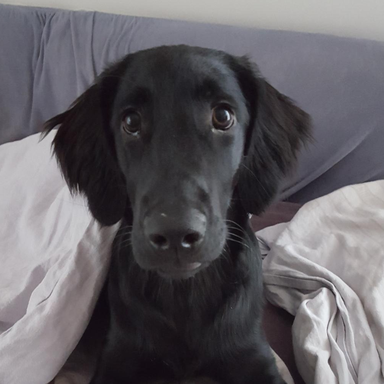

In [ ]:
from urllib.request import urlopen
from PIL import Image

# insert classes.txt file into folder 
class_file = open("classes.txt")
imagenet_classes = dict(enumerate(class_file))

img = Image.open(urlopen("https://git.scc.kit.edu/vy9905/ml2images/-/raw/main/flat_coated1.png")).resize((384,384), Image.LANCZOS)

img

In [ ]:
scaled_img = (np.array(img) / 128) - 1  # in the range -1, 1
input_image = torch.from_numpy(scaled_img).permute(2, 0, 1).unsqueeze(0).to(torch.float32) # channels first, add batch dimension
logits = my_transformer(input_image).detach() # get output for all classes

def prediction_given_logits(logits):
    probs = torch.nn.functional.softmax(logits, dim=-1) # calculate softmax for all classes

    # get the top 10 predictions
    top_probs, top_ixs = probs[0].topk(10)

    for i, (ix_, prob_) in enumerate(zip(top_ixs, top_probs)):
        ix = ix_.item()
        prob = prob_.item()
        cls = imagenet_classes[ix].strip()
        print(f"{i}: {cls:<45} --- {prob:.4f}")

prediction_given_logits(logits)

0: flat-coated_retriever                         --- 0.9830
1: curly-coated_retriever                        --- 0.0033
2: Labrador_retriever                            --- 0.0032
3: golden_retriever                              --- 0.0020
4: Sussex_spaniel                                --- 0.0016
5: Gordon_setter                                 --- 0.0009
6: groenendael                                   --- 0.0008
7: Saluki, gazelle_hound                         --- 0.0006
8: cocker_spaniel, English_cocker_spaniel, cocker --- 0.0003
9: tennis_ball                                   --- 0.0003


#Adversarial Attacks

Adversarial attacks change an image slightly in such a way that a neural net makes a wrong prediction

This is suprising, because random changes in an input don't change the prediction by much

In [ ]:
import torchvision
import matplotlib.pyplot as plt

# just for visualization later
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()



In [ ]:
# what happens if we randomly disturb the image?

# create random values in range [-0.25, 0.25]
random_noise = torch.zeros(1,3,384,384).uniform_(-0.25, 0.25)
random_noise

tensor([[[[ 0.0005,  0.0186, -0.0865,  ...,  0.1350,  0.1100,  0.1675],
          [ 0.1542, -0.0130, -0.1597,  ..., -0.0658, -0.2207, -0.0963],
          [ 0.0785, -0.0696,  0.2048,  ...,  0.0795, -0.0748,  0.2306],
          ...,
          [-0.1326, -0.2373, -0.0007,  ..., -0.0033, -0.0891,  0.0060],
          [-0.0859,  0.1519, -0.1847,  ..., -0.0717,  0.0242, -0.0166],
          [-0.1185,  0.2286, -0.1947,  ..., -0.0763,  0.2093, -0.0768]],

         [[ 0.1451,  0.0180, -0.0508,  ..., -0.1974,  0.2468,  0.1368],
          [ 0.1160,  0.2340,  0.0549,  ...,  0.0572, -0.0978,  0.2134],
          [-0.1683, -0.1502,  0.0862,  ..., -0.0748, -0.0732, -0.1391],
          ...,
          [ 0.0866, -0.2175, -0.2067,  ...,  0.2320, -0.1788, -0.1758],
          [ 0.0628,  0.2214, -0.0110,  ...,  0.0268, -0.1568,  0.0204],
          [ 0.1558, -0.0930,  0.0225,  ...,  0.1596, -0.1656, -0.1634]],

         [[-0.0329,  0.2105,  0.1528,  ...,  0.1692, -0.1585,  0.1018],
          [-0.2479, -0.0957, -

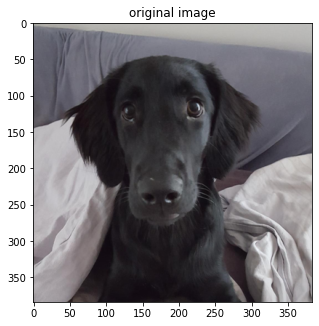

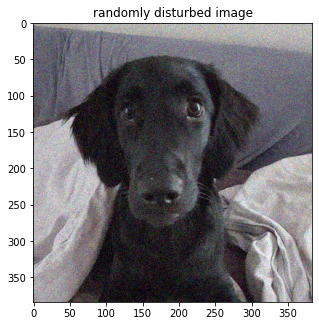


 Prediction of randomly changed image
0: flat-coated_retriever                         --- 0.9525
1: curly-coated_retriever                        --- 0.0218
2: Labrador_retriever                            --- 0.0058
3: Gordon_setter                                 --- 0.0037
4: Saluki, gazelle_hound                         --- 0.0028
5: groenendael                                   --- 0.0011
6: English_setter                                --- 0.0009
7: Sussex_spaniel                                --- 0.0008
8: black-and-tan_coonhound                       --- 0.0008
9: golden_retriever                              --- 0.0007


In [ ]:
# add it ontop of image
rand_disturbed_image = input_image + random_noise

# visualize original image
imshow(torchvision.utils.make_grid(input_image.cpu().data, normalize=True, value_range=(-1,1)), "original image")

# visualize disturbed image
imshow(torchvision.utils.make_grid(rand_disturbed_image.cpu().data, normalize=True, value_range=(-1,1)), "randomly disturbed image")


# predict the randomly disturbed image
rand_img_pred = my_transformer(rand_disturbed_image)
print("\n Prediction of randomly changed image")
prediction_given_logits(rand_img_pred)

# even with pretty big changes in our input image, our model predicts correctly


## Let's attack it with PGD to change the predicted class

Gradient based adversarial attacks are mostly the same as training a neural net.

### Normal training neural net:

*   Calculate the loss of the model by feeding it an image and comparing the output with the correct label of the image
*   Calculate the gradients with regards to model weights with backpropagation
*   Update the model weights with gradient descent to minimize the loss
*   Do this iteratively

### Untargeted PGD Attack:

*   Calculate the loss of the model by feeding it an image and comparing the output with the correct label of the image
*   Calculate the gradients with regards to the input image with backpropagation
*   Update the input image with gradient descent to maxmize the loss
*   Do this iteratively


### Targeted PGD Attack:

*   Calculate the loss of the model by feeding it an image and comparing the output with a false label of the image
*   Calculate the gradients with regards to the input image with backpropagation
*   Update the input image with gradient descent to minimize the loss of output and wrong label
*   Do this iteratively



In [ ]:
# at which index is the correct label?
# if we look at line 206 in classes.txt we see flatcoated retriever (so we take 205 because we start counting at 0)
correct_label_idx = torch.tensor([205]).cuda()

# in line 725 we see the class "pirate"
# let's save this for later too
pirate_label_idx = torch.tensor([724]).cuda()


# for training GPU is recomended
my_transformer.cuda()
# Reminder we are not training our model but our input image
# eval sets the model to evaluation mode, the weights of our model doen't change
my_transformer.eval()


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (proj): Linear(in_features=768, out_features=768, bias=True)
      )
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): MLP(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate=none)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (proj): Linear(in_features=768, out_features=768, bias=True)
      )
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)


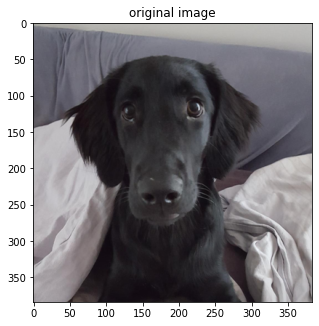


prediction for attacked image is: 
0: Weimaraner                                    --- 0.9994
1: Italian_greyhound                             --- 0.0002
2: quilt, comforter, comfort, puff               --- 0.0000
3: Chesapeake_Bay_retriever                      --- 0.0000
4: velvet                                        --- 0.0000
5: Mexican_hairless                              --- 0.0000
6: Bedlington_terrier                            --- 0.0000
7: muzzle                                        --- 0.0000
8: vizsla, Hungarian_pointer                     --- 0.0000
9: Great_Dane                                    --- 0.0000


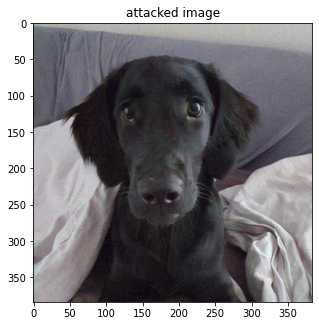

In [ ]:
def pgd_attack(model, image, label, eps=0.05, alpha=0.01, iters=40, targeted=False):
    """Attack a model with PGD (projected gradient descent).
    Parameters
    ----------
    model : our transformer 
    image : an image as torch tensor
    label : the correct label for this image in the untargetd attack
            the wrong label in the targeted attack
    eps   : how much the original image is allowed to be distorted
            normally an image has pixels with values between 0 and 255, 
            we normalize these values to (-1,1)
            eps=0.05 calculate back in the range (0,255)
            allows roughly each pixel to change by +/- 6
    alpha : learning rate, determines how much we change the image in each
            iteration
    iters : how often we change the input image with gradient descemt
    
    Returns
    -------
    image : torch.Tensor
        the attacked image
    """
    image = image.cuda()
    label = label.cuda()
    criterion = nn.CrossEntropyLoss()

    # original image that isn't disturbed by adversarial attack
    ori_image = image.data
        
    for i in range(iters) :
        # we want to calculate images for our input image
        image.requires_grad = True

        # get classification of image
        outputs = model(image)

        # set gradients to zero
        model.zero_grad()

        # calculate loss
        loss = criterion(outputs, label).cuda()
        loss.backward()

        # until here we haven't done anything special

        # get the gradients for each pixel of the image
        # we also sign them (so each gradient is either -1 or 1)
        signed_gradients = image.grad.sign()

        # standard gradient descent uses gradients of model weights and updates them
        # w_new = w - lr*gradients

        # adversarial gradient descent maximizes loss --> +
        # img_new = img + lr*gradients
        if not targeted:
            adv_image = image + alpha*signed_gradients

        if targeted:
            adv_image = image - alpha*signed_gradients
        # we aren't allowed to change the pixels by more than (-eps, eps)
        eta = torch.clamp(adv_image - ori_image, min=-eps, max=eps)

        # the image is also not allowed to have values outside [-1, 1]
        image = torch.clamp(ori_image + eta, min=-1, max=1).detach_()
    
    print("\nprediction for attacked image is: ")
    prediction_given_logits(outputs)
    return image

# display original image
imshow(torchvision.utils.make_grid(input_image.detach().data, normalize=True, value_range=(-1,1)), "original image")

# create attacked image
attacked_img = pgd_attack(my_transformer, input_image.detach(), correct_label_idx)

# display attacked image
imshow(torchvision.utils.make_grid(attacked_img.cpu().data, normalize=True, value_range=(-1,1)), "attacked image")


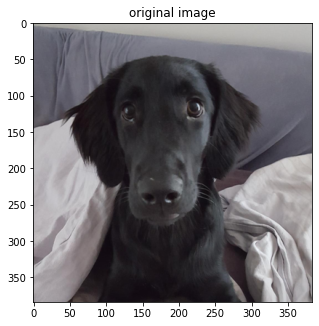


prediction for attacked image is: 
0: pirate, pirate_ship                           --- 1.0000
1: schooner                                      --- 0.0000
2: dock, dockage, docking_facility               --- 0.0000
3: flagpole, flagstaff                           --- 0.0000
4: liner, ocean_liner                            --- 0.0000
5: wreck                                         --- 0.0000
6: drilling_platform, offshore_rig               --- 0.0000
7: yawl                                          --- 0.0000
8: pier                                          --- 0.0000
9: lifeboat                                      --- 0.0000


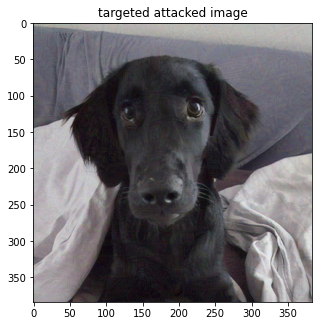

In [ ]:
# oftentimes the untargeted attack creates a prediction of a similar class

# With the targeted attack we can specify which class we want to get as result


# display original image
imshow(torchvision.utils.make_grid(input_image.detach().data, normalize=True, value_range=(-1,1)), "original image")

# create attacked image
attacked_img = pgd_attack(my_transformer, input_image.detach(), pirate_label_idx, targeted=True)

# display attacked image
imshow(torchvision.utils.make_grid(attacked_img.cpu().data, normalize=True, value_range=(-1,1)), "targeted attacked image")

